# Computer Vision with April Tag

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pupil_apriltags import Detector

### Image Processing


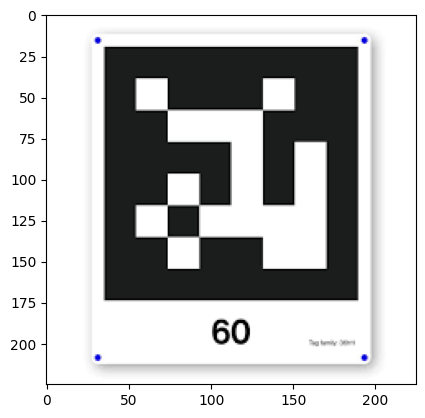

In [3]:
img = cv2.imread("Resource/april_tag_img.png")
plt.imshow(img)

In [4]:

at_detector = Detector(
   families="tag36h11",
   nthreads=1,
   quad_decimate=1.0,
   quad_sigma=0.0,
   refine_edges=1,
   decode_sharpening=0.25,
   debug=0
)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
at_detector.detect(gray)

[Detection object:
 tag_family = b'tag36h11'
 tag_id = 60
 hamming = 0
 decision_margin = 98.10137939453125
 homography = [[ 7.71934299e+01 -1.08767591e-02  1.12549730e+02]
  [ 1.66173144e-01  7.71899024e+01  9.70247073e+01]
  [ 1.84739643e-05 -5.73246488e-05  1.00000000e+00]]
 center = [112.54972989  97.02470734]
 corners = [[ 35.34810257 174.06163025]
  [189.73965454 174.38755798]
  [189.73965454  19.99946213]
  [ 35.36580276  19.66786766]]
 pose_R = None
 pose_t = None
 pose_err = None]

### Video Processing

In [5]:
cap = cv2.VideoCapture("Resource/AprilTagTest.mkv")
ret, frame = cap.read()

if (cap.isOpened()== False): 
    print("Error opening video stream or file")

while (cap.isOpened):
    # Capture each frame
    ret, frame = cap.read()
    
    if ret == True:
    # Display the resulting frame
        cv2.imshow('Frame', frame)
        
    # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

# Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

In [7]:

# see whether we can open the video
success = cap.grab()

frames = []
slopes = []
cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
camera_params = (cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
i=0

while success:
    if i % 100  == 0:
        
        _, frame = cap.retrieve()
        height, width, depth = frame.shape
        center = (int(width/2),int(height/2))
        print(center)
        cv2.line(frame, (int(width/2), center[1]-50), (int(width/2), center[1]+50), (255, 0, 0), 5)
        cv2.line(frame, (center[0]-50,int(height/2)), (center[0]+50, int(height/2)), (255, 0, 0), 5)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        tags = at_detector.detect(frame, True, camera_params, 0.1)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
        for tag in tags:
            for idx in range(len(tag.corners)):
                #drawing the lines and write text
                cv2.line(gray_frame, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))
                cv2.putText(gray_frame, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=2,
                color=(0, 0, 255))
            (cX, cY) = (int(tag.center[0]), int(tag.center[1]))
            cv2.circle(gray_frame, (cX, cY), 5, (0, 0, 255), -1)
            dist = (cX-center[0],cY-center[1])
            print(f"distance: {dist[0],dist[1]}")
            cv2.line(gray_frame,center,(int(cX),int(cY)),(0, 0, 255),5)

        plt.imshow(gray_frame)
        plt.pause(0.01)  # Pause for a short time to show the figure
        plt.clf()
    i+=1
    success = cap.grab()
# Release the video capture
cap.release()

# Close the plot window
plt.close()

#### Combine Both 

In [ ]:
cap = cv2.VideoCapture("Resource/AprilTagTest.mkv")

cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
camera_params = (cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
cv2.namedWindow("window", cv2.WINDOW_NORMAL)
center = (960,540)
print(f"center: ({center[0]}, {center[1]})")

if (cap.isOpened()== False): 
    print("Error opening video stream or file")

while cap.isOpened():
    # Capture each frame
    ret, frame = cap.read()

    if ret == False:
         break

    height, width, depth = frame.shape
    cv2.line(frame, (int(width/2), center[1]-50), (int(width/2), center[1]+50), (255, 0, 0), 5)
    cv2.line(frame, (center[0]-50,int(height/2)), (center[0]+50, int(height/2)), (255, 0, 0), 5)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    tags = at_detector.detect(frame, True, camera_params, 0.1)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)

    for tag in tags:
            for idx in range(len(tag.corners)):
                #drawing the lines and write text
                cv2.line(gray_frame, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))
                cv2.putText(gray_frame, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=2,
                color=(0, 0, 255))
            (cX, cY) = (int(tag.center[0]), int(tag.center[1]))
            cv2.circle(gray_frame, (cX, cY), 5, (0, 0, 255), -1)
            dist = (cX-center[0],cY-center[1])
            print(f"distance: {dist[0],dist[1]}")
            cv2.line(gray_frame,center,(int(cX),int(cY)),(0, 0, 255),5)

    if ret == True:
    # Display the resulting frame
        cv2.imshow('window', gray_frame)
        
    # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

# Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

center: (960, 540)
distance: (136, -224)
distance: (136, -224)
distance: (136, -224)
distance: (136, -223)
distance: (136, -223)
distance: (135, -223)
distance: (135, -222)
distance: (134, -221)
distance: (134, -220)
distance: (134, -220)
distance: (135, -219)
distance: (136, -218)
distance: (139, -218)
distance: (141, -218)
distance: (144, -219)
distance: (148, -218)
distance: (153, -217)
distance: (160, -214)
distance: (169, -209)
distance: (179, -203)
distance: (190, -196)
distance: (200, -191)
distance: (211, -185)
distance: (220, -181)
distance: (232, -177)
distance: (246, -172)
distance: (439, -153)
distance: (455, -154)
distance: (469, -155)
distance: (480, -156)
distance: (488, -155)
distance: (496, -155)
distance: (504, -155)
distance: (508, -155)
distance: (511, -155)
distance: (513, -156)
distance: (512, -156)
distance: (510, -156)
distance: (507, -156)
distance: (502, -157)
distance: (496, -157)
distance: (490, -158)
distance: (486, -159)
distance: (485, -160)
distance: (48

AttributeError: 'NoneType' object has no attribute 'shape'

### Camera Processing

In [ ]:
# Open the default camera
cam = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cam.isOpened():
    print("Error: Could not open camera.")
    exit()

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()

    # !!! CRITICAL: Check if the frame was read successfully (ret is True)
    if not ret:
        print("Camera failed to read frame, exiting loop...")
        break

    # Write the frame to the output file
    out.write(frame)

    # Display the captured frame
    cv2.imshow('Camera', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()

Error: Could not open camera.
Camera failed to read frame, exiting loop...


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


: 